# install dependancies, takes around 45 seconds

Rendering Dependancies



In [2]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
#!pip install gym pyvirtualdisplay 2>&1
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

# Imports and Helper functions


In [32]:
import sys, os, copy
from pathlib import Path
from a2c.a2c import *
#from torch.distributions import Categorical
proj_folder = Path('.').absolute()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
action_dist = Categorical(NeuralNet(nS, nA, activation=nn.Softmax(dim=1))(torch.randn((1,4))))
#
action = action_dist.sample()
action_logprob = action_dist.log_prob(action)
print(action, action_logprob)

tensor([0]) tensor([-0.5790], grad_fn=<SqueezeBackward1>)


# Run Simulations!

In [106]:
import argparse, matplotlib.pyplot as plt, tqdm
def parse_a2c_arguments():
    # Command-line flags are defined here.
    parser = argparse.ArgumentParser()
    parser.add_argument('--env-name', dest='env_name', type=str,
                        default='CartPole-v0', help="Name of the environment to be run.")   # 'LunarLander-v2'
    parser.add_argument('--num-episodes', dest='num_episodes', type=int,
                        default=3500, help="Number of episodes to train on.")    # 3500
    parser.add_argument('--lr', dest='lr', type=float,
                        default=5e-4, help="The actor's learning rate.")
    parser.add_argument('--use_a2c', dest='use_a2c', type=bool,
                        default=True, help="Use A2C")
    parser.add_argument('--use_baseline', dest='use_baseline', type=bool,
                        default=True, help="Use baseline model")
    parser.add_argument('--baseline-lr', dest='baseline_lr', type=float,
                        default=5e-4, help="The actor's learning rate.")
    parser.add_argument('--critic-lr', dest='critic_lr', type=float,
                        default=1e-4, help="The critic's learning rate.")
    parser.add_argument('--n', dest='n', type=int,
                        default=100, help="The value of N in N-step A2C.")

    parser_group = parser.add_mutually_exclusive_group(required=False)
    parser_group.add_argument('--render', dest='render',
                              action='store_true',
                              help="Whether to render the environment.")
    parser_group.add_argument('--no-render', dest='render',
                              action='store_false',
                              help="Whether to render the environment.")
    parser.set_defaults(render=False)

    return parser.parse_known_args()[0]    #.parse_args()
args = parse_a2c_arguments()
DEBUG=False

In [ ]:
history, res, A2C_net = main_a2c(args)

Episode: 1742
Finished after 110 timesteps
Episode: 1743
Finished after 109 timesteps
Episode: 1744
Finished after 119 timesteps
Episode: 1745
Finished after 108 timesteps
Episode: 1746
Finished after 108 timesteps
Episode: 1747
Finished after 118 timesteps
Episode: 1748
Finished after 125 timesteps
Episode: 1749
Finished after 124 timesteps
Episode: 1750
Finished after 119 timesteps
Episode: 1751
Finished after 126 timesteps
Episode: 1752
Finished after 129 timesteps
Episode: 1753
Finished after 125 timesteps
Episode: 1754
Finished after 126 timesteps
Episode: 1755
Finished after 134 timesteps
Episode: 1756
Finished after 129 timesteps
Episode: 1757
Finished after 129 timesteps
Episode: 1758
Finished after 119 timesteps
Episode: 1759
Finished after 128 timesteps
Episode: 1760
Finished after 108 timesteps
Episode: 1761
Finished after 110 timesteps
Episode: 1762
Finished after 139 timesteps
Episode: 1763
Finished after 114 timesteps
Episode: 1764
Finished after 129 timesteps
Episode: 17

 40%|████████████████                        | 2/5 [32:41<51:17, 1025.98s/it]

Finished after 16 timesteps
Seed:2
Episode: 0
Finished after 10 timesteps
[Policy Evaluation]
Finished after 19 timesteps
Finished after 15 timesteps
Finished after 26 timesteps
Finished after 20 timesteps
Finished after 18 timesteps
Finished after 15 timesteps
Finished after 25 timesteps
Finished after 34 timesteps
Finished after 18 timesteps
Finished after 19 timesteps
Finished after 12 timesteps
Finished after 14 timesteps
Finished after 18 timesteps
Finished after 12 timesteps
Finished after 22 timesteps
Finished after 26 timesteps
Finished after 32 timesteps
Finished after 12 timesteps
Finished after 16 timesteps
Finished after 26 timesteps
The test reward for episode 0 is 18.95 with sd of 6.264782518172518.
Episode: 1
Finished after 12 timesteps
Episode: 2
Finished after 34 timesteps
Episode: 3
Finished after 24 timesteps
Episode: 4
Finished after 28 timesteps
Episode: 5
Finished after 49 timesteps
Episode: 6
Finished after 39 timesteps
Episode: 7
Finished after 15 timesteps
Epis

 60%|████████████████████████                | 3/5 [52:38<36:47, 1103.69s/it]

Finished after 95 timesteps
Seed:3
Episode: 0
Finished after 27 timesteps
[Policy Evaluation]
Finished after 27 timesteps
Finished after 30 timesteps
Finished after 37 timesteps
Finished after 10 timesteps
Finished after 15 timesteps
Finished after 37 timesteps
Finished after 13 timesteps
Finished after 18 timesteps
Finished after 28 timesteps
Finished after 26 timesteps
Finished after 53 timesteps
Finished after 26 timesteps
Finished after 14 timesteps
Finished after 20 timesteps
Finished after 42 timesteps
Finished after 26 timesteps
Finished after 12 timesteps
Finished after 19 timesteps
Finished after 12 timesteps
Finished after 21 timesteps
The test reward for episode 0 is 23.3 with sd of 11.059385154700056.
Episode: 1
Finished after 14 timesteps
Episode: 2
Finished after 16 timesteps
Episode: 3
Finished after 36 timesteps
Episode: 4
Finished after 22 timesteps
Episode: 5
Finished after 39 timesteps
Episode: 6
Finished after 18 timesteps
Episode: 7
Finished after 38 timesteps
Epis

Text(0, 0.5, 'Return')

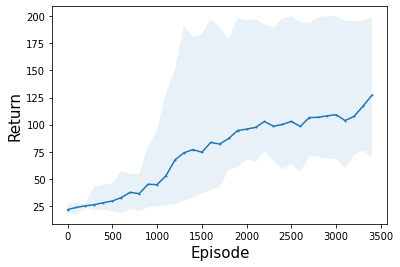

In [103]:
ks = np.arange(l)*100
avs = np.mean(res, axis=0)
maxs = np.max(res, axis=0)
mins = np.min(res, axis=0)

plt.fill_between(ks, mins, maxs, alpha=0.1)
plt.plot(ks, avs, '-o', markersize=1)

plt.xlabel('Episode', fontsize = 15)
plt.ylabel('Return', fontsize = 15)

if not os.path.exists('./plots'):
    os.mkdir('./plots')

# if A2C_net.type == 'A2C' or A2C_net.type == 2:
#     plt.title("A2C Learning Curve for N = {}".format(args.n), fontsize = 24)
#     plt.savefig("./plots/a2c_curve_N={}.png".format(args.n))
# elif A2C_net.type == 'Baseline' or A2C_net.type == 1:
#     plt.title("Baseline Reinforce Learning Curve".format(args.n), fontsize = 24)
#     plt.savefig("./plots/Baseline_Reinforce_curve.png".format(args.n))
# elif A2C_net.type == 'Reinforce' or A2C_net.type == 0: # Reinforce
#     plt.title("Reinforce Learning Curve", fontsize = 24)
#     plt.savefig("./plots/Reinforce_curve.png") 